In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.float_format', lambda x: f'{x:.5f}')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'Z:\uncertainty_quantification\datasets\craigslist_cleaned.csv')
backup = df.copy()

In [ ]:
results_location = r'Z:\uncertainty_quantification\outputs\evals'
results_list = ['prune_new_ds_base_point_new_ds_s1_20251120-201501', 
                'prune_new_ds_base_point_new_ds_s2_20251120-201510',
                'prune_new_ds_base_point_new_ds_s3_20251120-201517'] 
results_dict = {}

base_path = Path(results_location)
print(base_path)

for i, result in enumerate(results_list):
    i = i + 1
    specific_location = base_path / result / 'test_preds.csv'
    print(specific_location)
    results_dict[f'seed_{i}'] = pd.read_csv(specific_location)
    print(f"Shape for seed {i}: {results_dict[f'seed_{i}'].shape}")  


Z:\uncertainty_quantification\outputs\evals
Z:\uncertainty_quantification\outputs\evals\train_from_best_tryA_s1_20251119-160802\test_preds.csv
Shape for seed 1: (83471, 3)
Z:\uncertainty_quantification\outputs\evals\train_from_best_tryA_s2_20251119-160808\test_preds.csv
Shape for seed 2: (83471, 3)
Z:\uncertainty_quantification\outputs\evals\train_from_best_tryA_s3_20251119-160814\test_preds.csv
Shape for seed 3: (83471, 3)


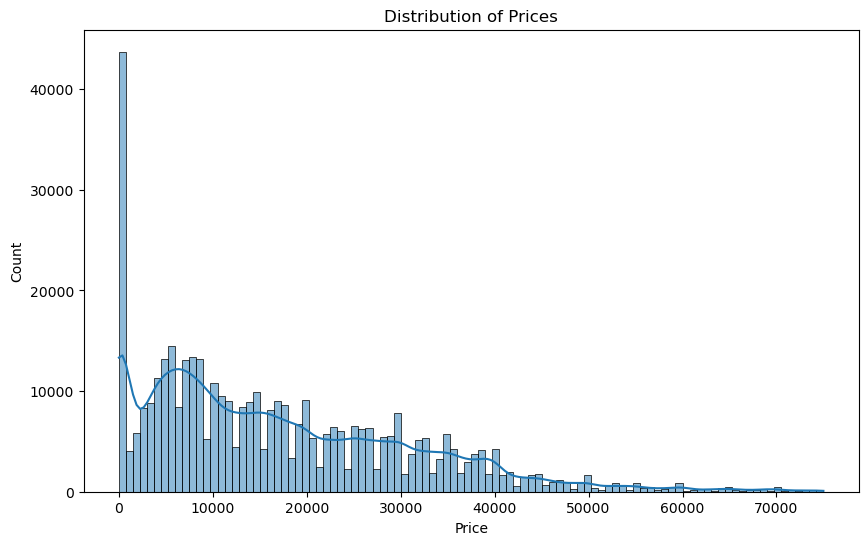

In [6]:
plt.figure(figsize=(10, 6))

# Create the histogram
# kde=True adds the smooth curve line
sns.histplot(data=df, x='price', bins=100, kde=True)

plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [13]:
df[(df['price'] > 0) & (df['price'] < 100)].shape

(3181, 21)

In [14]:
df[df['price'] == 0].shape

(32142, 21)

In [18]:
df_zeros = df[df['price'] == 0]
df_zeros.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,lat,long,posting_date,posting_date_formatted,quarter,id
178,augusta,0,2010,ford,ranger xlt extended cab,like new,6 cylinders,gas,200000,clean,automatic,rwd,truck,white,ga,33.51425,-82.08258,2021-04-04 10:20:00,2021-04-04 10:20:48,Y2021Q2,178
194,augusta,0,2013,chevrolet,suburban lt,excellent,8 cylinders,gas,169278,clean,automatic,rwd,suv,silver,ga,33.51617,-82.07857,2021-04-04 10:21:00,2021-04-04 10:21:51,Y2021Q2,194
195,augusta,0,2008,toyota,tundra sr5,excellent,8 cylinders,gas,200000,clean,automatic,rwd,truck,blue,ga,33.51592,-82.07896,2021-04-04 10:24:00,2021-04-04 10:24:40,Y2021Q2,195
258,delaware,0,2012,ford,focus,not_available,4 cylinders,other,122993,clean,automatic,not_available,not_available,not_available,de,39.88570,-75.30820,2021-04-04 11:15:00,2021-04-04 11:15:22,Y2021Q2,258
286,delaware,0,2007,ford,f-150,not_available,8 cylinders,other,189422,clean,automatic,not_available,not_available,not_available,de,39.88570,-75.30820,2021-04-04 11:31:00,2021-04-04 11:31:13,Y2021Q2,286
